In [1]:
#Import the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from keras import Sequential
from keras.layers import Dense

In [2]:
#Read .csv file
titanic = pd.read_csv('Testing.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Data Cleaning
titanic.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic = titanic.drop(columns = ['Name', 'Cabin', 'Ticket'])

In [8]:
titanic = titanic.dropna(subset = ['Age', 'Embarked'])

In [9]:
titanic.isna().sum()
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [10]:
#Feature Classification 
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [11]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [12]:
sex = {'male': 1,'female': 0}
embark = {'S': 0,'Q': 1, 'C': 2}

In [13]:
titanic['Sex'].replace(sex, inplace=True)
titanic['Embarked'].replace(embark, inplace=True)

In [14]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,2
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [15]:
titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,0.636236,29.642093,0.514045,0.432584,34.567251,0.404494
std,258.683191,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648,0.779038
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000,0.000000
50%,445.000000,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.645850,0.000000
75%,677.250000,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,2.000000


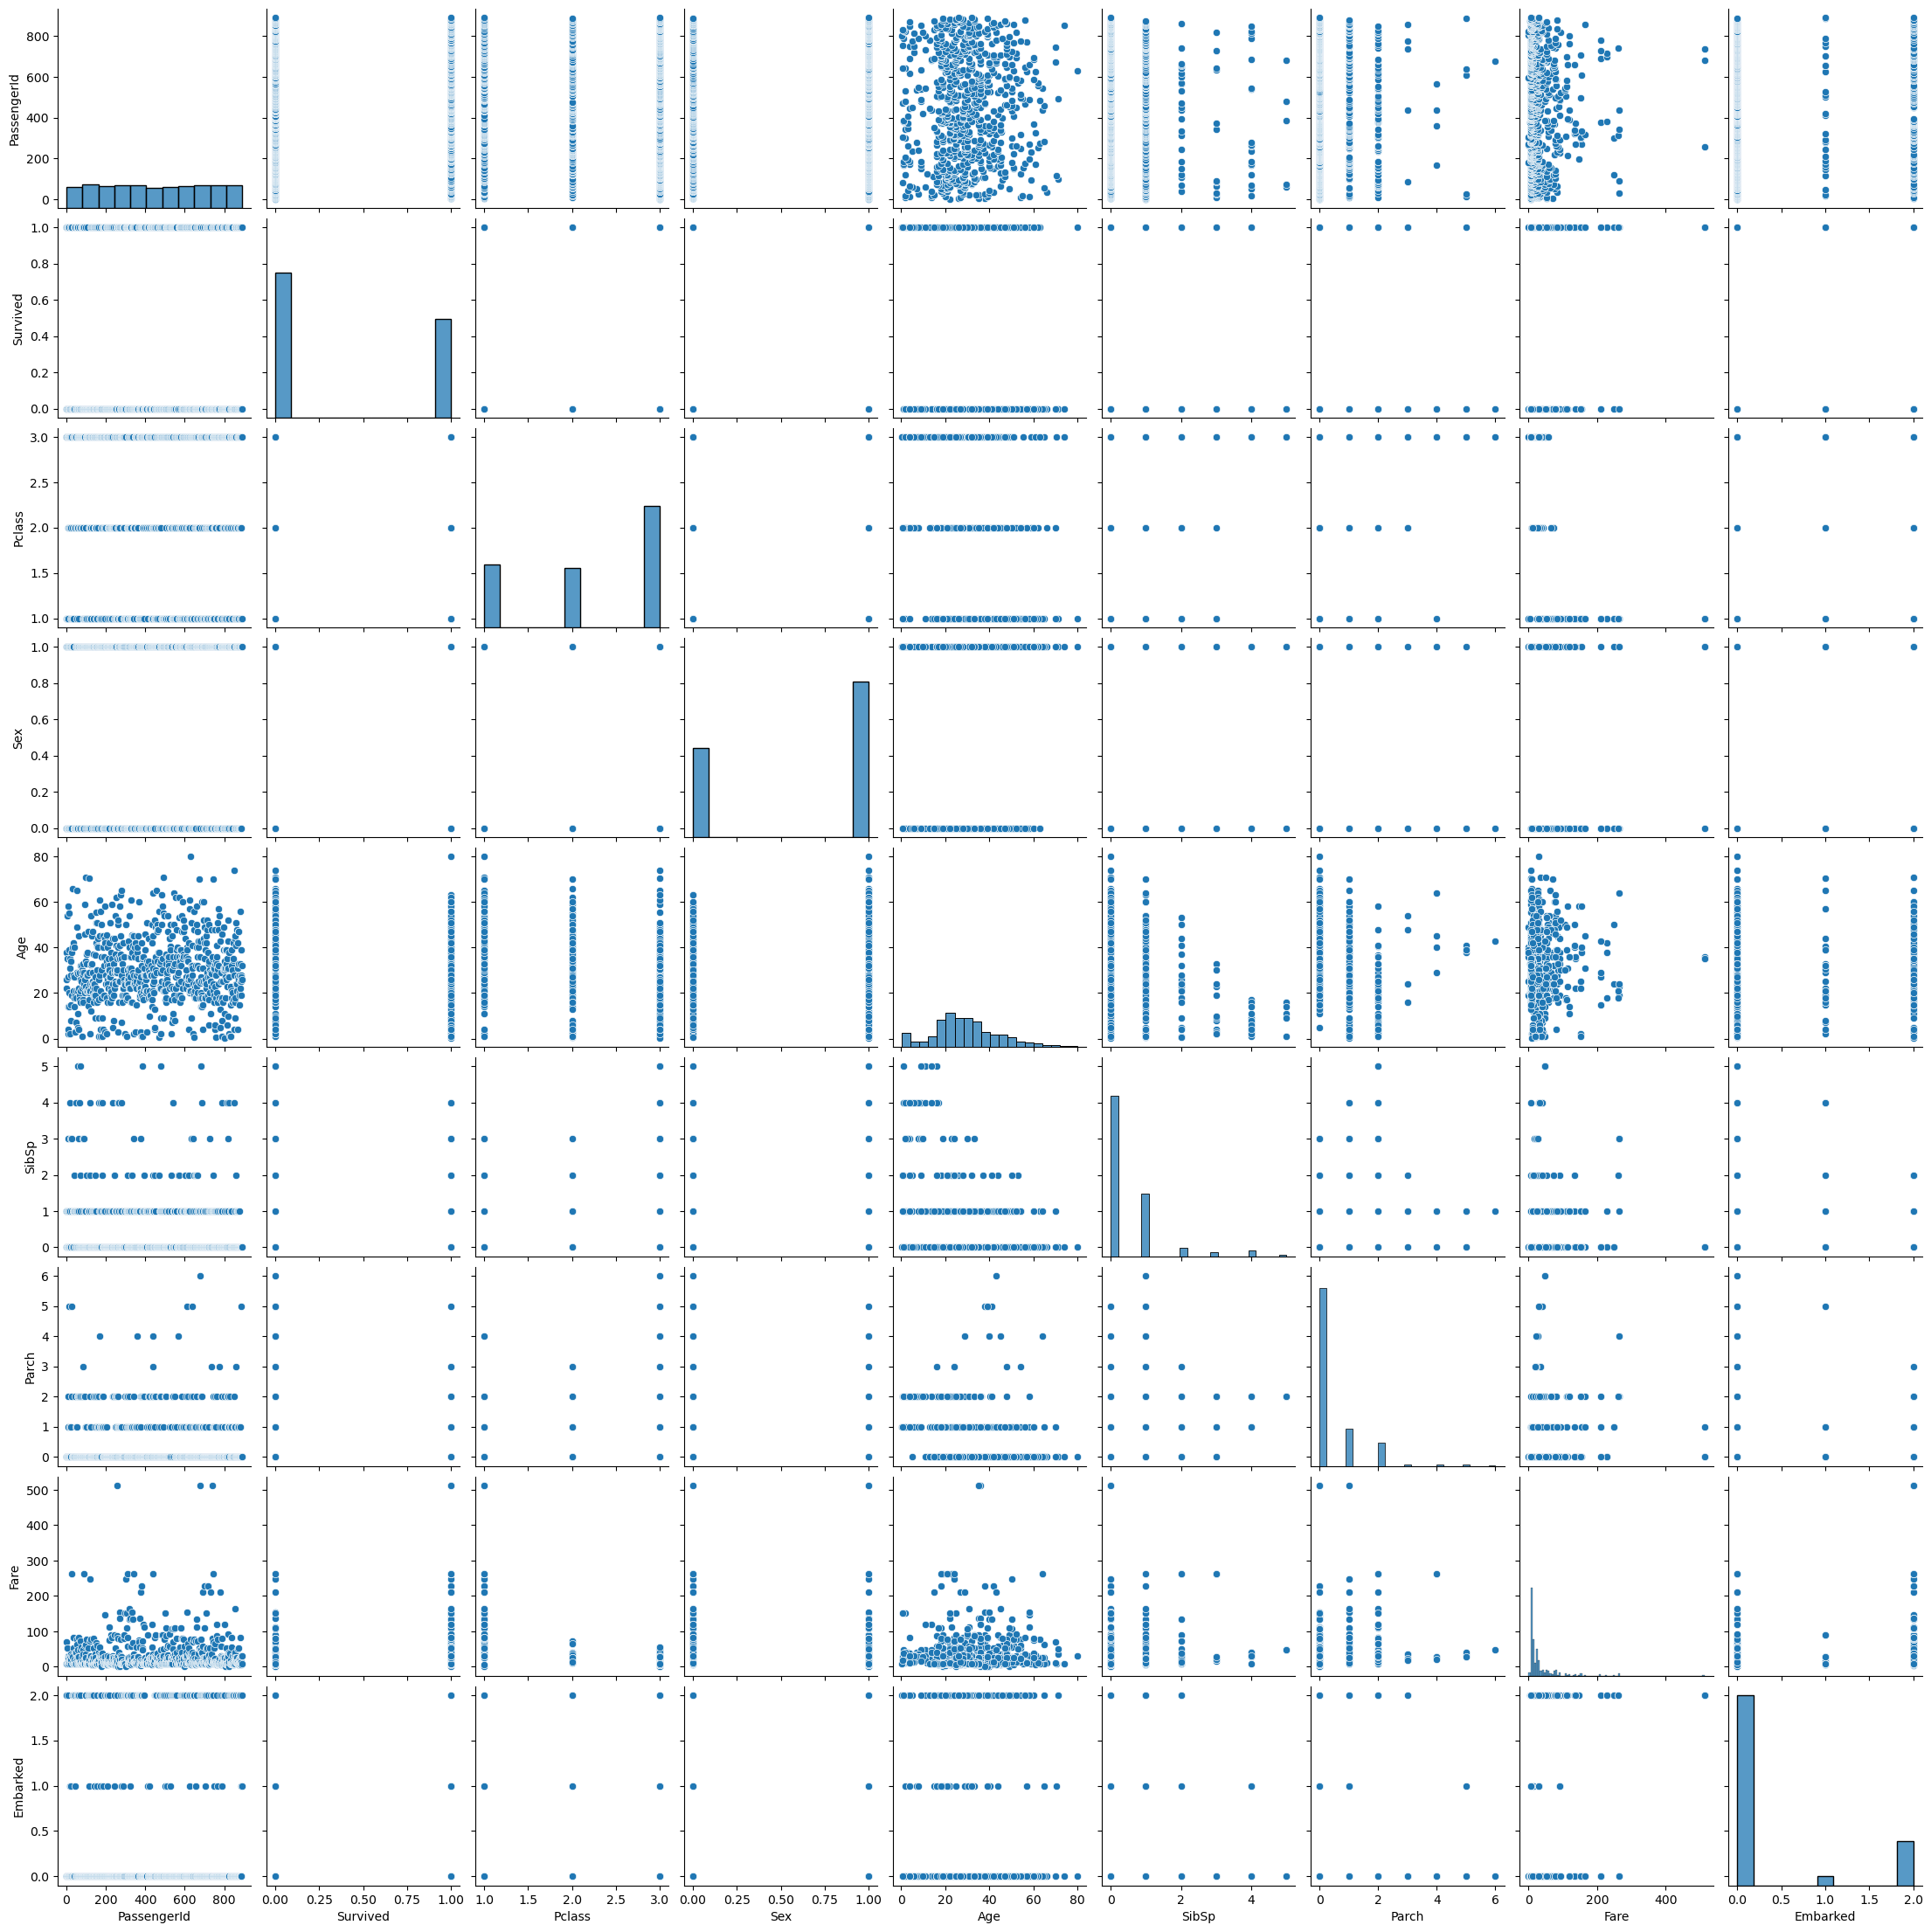

In [16]:
sns.pairplot(titanic)

In [17]:
# X and y representation
X = titanic.drop(columns = ['Survived'])
y = titanic ['Survived']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

In [19]:
# KNN 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 20)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [21]:
y_pred = classifier.predict(X_test)

In [22]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
result1 = classification_report(y_test, y_pred)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Accuracy: 0.8671328671328671


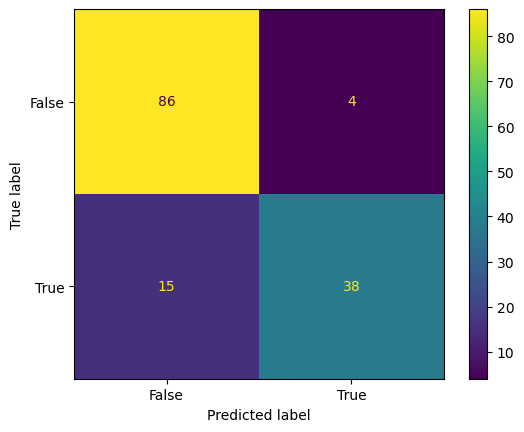

In [23]:
z = confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = z, display_labels = [False, True])

cm_display.plot()
plt.show()

In [24]:
#lOGISTIC REGRESSION
machinelearn = LogisticRegression()
machinelearn.fit(X_train, y_train)
machinelearn.score(X_test,y_test)

0.8461538461538461

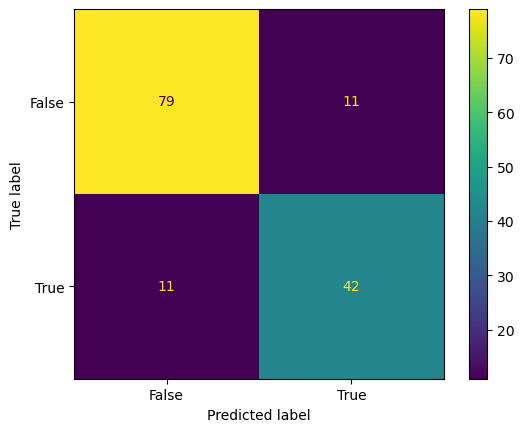

In [25]:
y_pred = machinelearn.predict(X_test)
z = confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = z, display_labels = [False, True])

cm_display.plot()
plt.show()

In [26]:
#NEURAL NETWORK
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fit the model on the dataset
model.fit(X, y, epochs=150, batch_size=30)

#Evaluate the model
_,accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))
model.summary()


Epoch 1/150
24/24 [==============================] - 1s 2ms/step - loss: 12.9680 - accuracy: 0.5913
Epoch 2/150
24/24 [==============================] - 0s 2ms/step - loss: 3.2537 - accuracy: 0.4298
Epoch 3/150
24/24 [==============================] - 0s 2ms/step - loss: 2.1713 - accuracy: 0.4157
Epoch 4/150
24/24 [==============================] - 0s 2ms/step - loss: 1.6245 - accuracy: 0.3680
Epoch 5/150
24/24 [==============================] - 0s 2ms/step - loss: 1.3268 - accuracy: 0.4199
Epoch 6/150
24/24 [==============================] - 0s 2ms/step - loss: 1.1197 - accuracy: 0.4354
Epoch 7/150
24/24 [==============================] - 0s 2ms/step - loss: 0.9483 - accuracy: 0.4607
Epoch 8/150
24/24 [==============================] - 0s 2ms/step - loss: 0.8346 - accuracy: 0.4565
Epoch 9/150
24/24 [==============================] - 0s 2ms/step - loss: 0.7508 - accuracy: 0.4944
Epoch 10/150
24/24 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.5590
Epoch 11

In [ ]:
#Comparison : Logistic Regression and KNN has a only a low difference in accuracy both having an accuracy above 80% .KNN has 86.7% while Logistic Regression has 84.6%. On the other hand, the Neural Network has 77.53%. X_train, X_test, y_train, and y_test were used to all the models while the X and y variables were used for the neural network having a test size or 20%
#Analysis : Data cleaning is crucial in this approach, removing unnecessary features and cleansing the data my also removing cells with no information must be well observed in order for it to be used in the model. In addition to that, classifying strings into numbers was also done. Machine learning algorithms gives a better accuracy than the neural network, with regards to the adjustment of the parameters to achieve a better result or accuracy. 
#Conclusion : As a conclusion, data cleaning and classifying the data was done throughout the notebook. Machine learning algorithms achieved a better accuracy than the neural network.